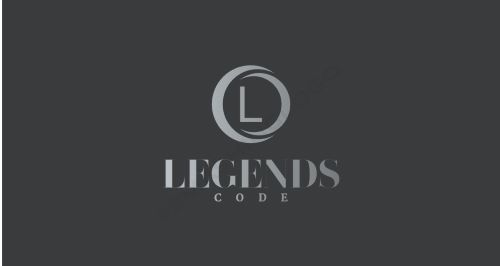

### Project: Finding the Best Markets to Advertise In

#### Introduction: 

In this project I will be working with a fictitious e-learning company called Legends Code that offers courses on programming. Most of the courses offered are on web and mobile development, but they also cover other topics like data science, game development, etc. The e-learning company wants to promote their product and would like to invest money in advertisements. 

The __goal__ of this project is to find out the two best markets to advertise their product in. Given the cost of sending surveys to different target markets the company prefers to do some initial analysis using a free source. 

In the project I will be using 2017 survey results from [FreeCodeCamp](https://www.freecodecamp.org/). FreeCodeCamp is a website that is funded by donations. Their main purpose is to help people learn to code for free. They accomplish this by creating videos, articles, and interactive coding lessons. Not only is FreeCodeCamp actually free but you can earn certificates as well. The survey data can be found here [GitHub Repository](https://github.com/freeCodeCamp/2017-new-coder-survey) 

I will begin with loading in the libraries needed and initially explore the dataset. 

In [3]:
import pandas as pd 
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
# dataset has 136 rows. Avoiding the truncated view. 
pd.options.display.max_columns=140

survey_2017 = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [4]:
survey_2017.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [5]:
survey_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


### Exploring the columns:

Looking at the survey.head above to see what columns might be usefull for my analysis. Age, CityPopulation, CountryLive, EmploymentField, EmploymentStatus, Gender, Income, JobRoleInterest, LanguageAtHome, MoneyForLearning and MonthsProgramming all stand out to me. They all seem like good preliminary columns to start exploring. 

Since Legends Code's main teaching focus is web and app development I will start with the JobRoleInterest column.

Also a source of understanding each column can be found here. [FreeCodeCamp Github](https://github.com/freeCodeCamp/2017-new-coder-survey/blob/master/clean-data/datapackage.json)

In [6]:
print(survey_2017['JobRoleInterest'].isnull().value_counts())

round((survey_2017['JobRoleInterest'].isnull().value_counts() / 18175) * 100,2)

True     11183
False     6992
Name: JobRoleInterest, dtype: int64


True     61.53
False    38.47
Name: JobRoleInterest, dtype: float64

### Comments:

As we can see above 61.53% of the column is a non null value. I have almost 39% that is missing. Lets see what the value counts are. 

In [7]:
survey_2017['JobRoleInterest'].value_counts().head(30)

Full-Stack Web Developer                                                       823
  Front-End Web Developer                                                      450
  Data Scientist                                                               152
Back-End Web Developer                                                         142
  Mobile Developer                                                             117
Game Developer                                                                 114
Information Security                                                            92
Full-Stack Web Developer,   Front-End Web Developer                             64
  Front-End Web Developer, Full-Stack Web Developer                             56
  Product Manager                                                               55
Data Engineer                                                                   53
  User Experience Designer                                                      52
  Us

### Comments:

Above I can see some survey respondents listed multiple jobs. For example we have Front-End Web Developer listed over 10 times spread across the entire top 30 value counts. 

Below there is a column named JobInterestFrontEnd this column shows 4047 entries for the role Front End Web Developer. 

Ill clean the Job Role Intreset column first and see how many people are interested in multiple job rolls. Then ill see how the job role interest compare to the job interest front end column

In [8]:
survey_2017['JobInterestFrontEnd'].value_counts()

1.0    4047
Name: JobInterestFrontEnd, dtype: int64

In [9]:
survey_2017['JobRoleInterest'].astype(str)


survey_2017['JobRoleInterest'] = survey_2017['JobRoleInterest'].str.replace(r'  |-', ' ', regex=True).str.replace(r',\s+', ',', regex=True).str.strip().str.lower().str.split(',')
                                       

In [10]:
survey_2017['JobRoleInterest'].value_counts().head(30)

[full stack web developer]                                                     823
[front end web developer]                                                      450
[data scientist]                                                               152
[back end web developer]                                                       142
[mobile developer]                                                             117
[game developer]                                                               114
[information security]                                                          92
[full stack web developer, front end web developer]                             64
[front end web developer, full stack web developer]                             56
[product manager]                                                               55
[data engineer]                                                                 53
[user experience designer]                                                      52
[use

In [11]:
numberofroles = (survey_2017['JobRoleInterest'].apply(lambda x: len(x) if x is not np.nan else np.nan).value_counts(normalize= True))
numberofroles = round(numberofroles * 100,1)
print(numberofroles)

1.0     31.7
3.0     15.9
4.0     15.2
5.0     12.0
2.0     10.9
6.0      6.7
7.0      3.9
8.0      1.8
9.0      1.0
10.0     0.5
12.0     0.3
11.0     0.2
13.0     0.0
Name: JobRoleInterest, dtype: float64


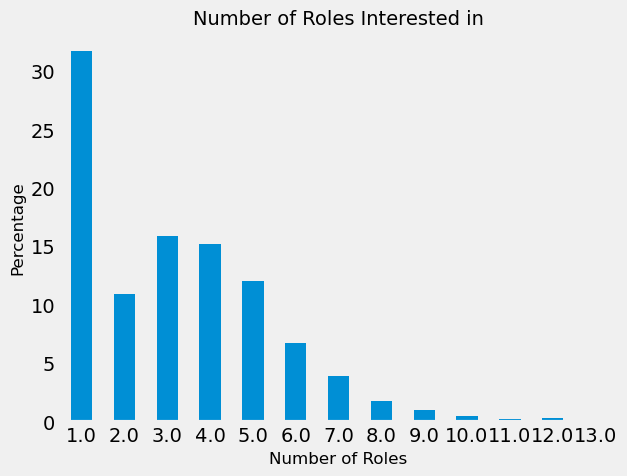

In [12]:
numberofroles.sort_index().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Percentage',fontsize=12)
plt.xlabel('Number of Roles', fontsize=12)
plt.title('Number of Roles Interested in', fontsize=14)
plt.grid(False)
plt.show()

### Comments:

As we can see by the bar graph above over 30% of respondents are interested in 1 role or specialization. After 1 specialization it drops by over 50%. 

Only about 16% are interested in 3 roles/specializations. 

Respondents looking at 4 or less roles equal 73% of all respondents. 

Lets look at the jobs that the respondents are most interested in. 

### Job roles of interest:

In [13]:
job_roles = {}

for roles in survey_2017['JobRoleInterest']:
    if roles is not np.nan:
        for role in roles: 
            if role in job_roles:
                job_roles[role] += 1 
            else: 
                job_roles[role] = 1

job_role = pd.DataFrame(job_roles.items(), columns=['Role_Name','Count'])        

job_role = job_role.set_index('Role_Name')
print(job_role.sort_values('Count', ascending = False).head(10))

                          Count
Role_Name                      
full stack web developer   4198
front end web developer    3533
back end web developer     2772
mobile developer           2305
data scientist             1643
game developer             1628
user experience designer   1469
information security       1326
data engineer              1248
devops / sysadmin           927


In [14]:
job_role.sort_values('Count', ascending = False).tail(20)

,Count
Role_Name,
front end web designer,1
computer architect,1
user interface design,1
networking,1
ai and machine learning,1
computer engineer,1
systems programming,1
software engineer (computer science based),1
technology management,1


### Comments: 

As we can see by the tail we are losing some answers. A respondent did not necessarily list all roles in the final question as expected or it was not input correctly. We have typos and short hand. This would be alot to sort and filter through to clean up. The good news is that all of the top 10 roles are seperate columns in the survey_2017 dataframe. So I can use this data as well. 

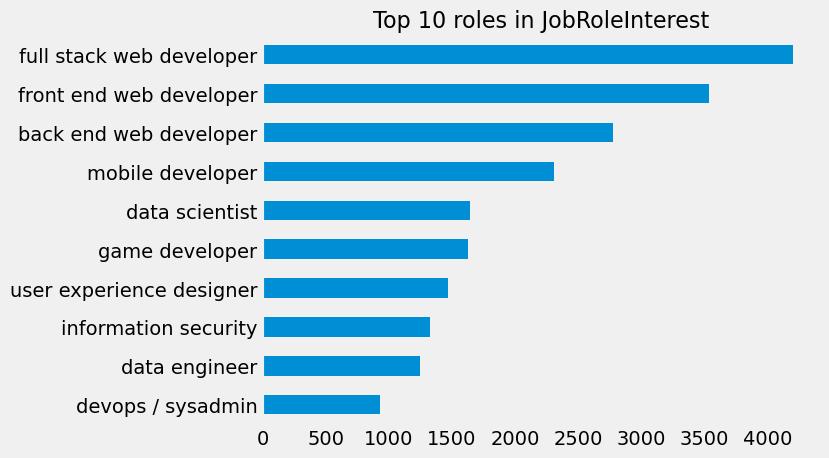

In [15]:
ax = job_role['Count'].sort_values(ascending=False).head(10).plot.barh()
ax.invert_yaxis()
plt.grid(False)
plt.ylabel("")
plt.title('Top 10 roles in JobRoleInterest', fontsize=16)
plt.show()

### Comments: 

The top 2 courses Legends Code focuses on is web and app development. As we can see above the top 4 roles respondents are interested in is web and mobile development. 

Lets count the seperate columns of job interest for the top 4. Combine them into 2 categories web developer and mobile developer and see what the percentage looks like from the total respondents interested. 

### Job Interest Columns: 

In [16]:
survey_roles = survey_2017.iloc[:,53:66].copy()

66.5 14.7 18.8


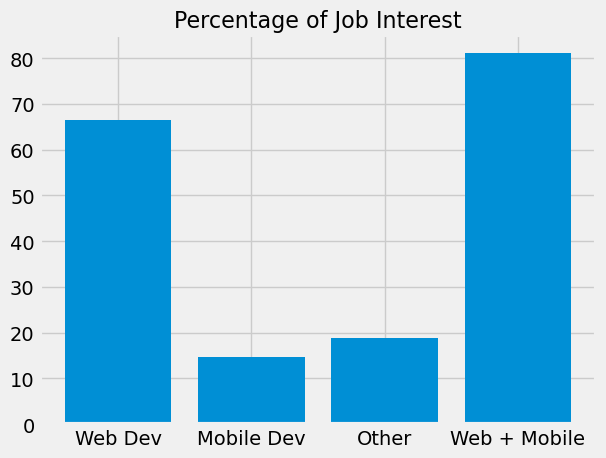

In [17]:
Back = survey_roles['JobInterestBackEnd'].sum()
Front = survey_roles['JobInterestFrontEnd'].sum()
Full = survey_roles['JobInterestFullStack'].sum()
mobile = survey_roles['JobInterestMobile'].sum()

Web_Developer = (Back + Front + Full) / 18175 
Web_percent = round(Web_Developer * 100,1)

mobile_developer = round((mobile / 18175) * 100,1)

other = round(100 -  (mobile_developer + Web_percent),1)  

total = Web_percent + mobile_developer

print(Web_percent, mobile_developer,other)

x = ('Web Dev', 'Mobile Dev', 'Other', 'Web + Mobile')
y = (Web_percent, mobile_developer, other, total)

plt.bar(x, y)
plt.ylim(0,85)
plt.title('Percentage of Job Interest', fontsize=16)
plt.show()

### Comments: 

As we can see above Web Developer is over 60% and mobile developer is over 10%. Combining the two fields gives a total slightly over 80%. This shows that the main two courses are good fields to continue to focus on. With this data right now we dont need to expand our search into other fields. As we can see how low interest is in other fields. The table below is the exact percentages. 

Web Developer     |   |Other
-------------|---------------------------|-----------|
66.5%||18.8% 
__Mobile Developer__| 
14.7%|
__Total__| |  
__81.2%__| | 

### New Coders Locations and Densities:

Now since we know that people are interested to learn the courses Legends Code offers we need to determine the markets where to advertise. Which market has the most individuals we can reach. We have 2 columns that relate to geographic locations. CountryCitizen and CountryLive. To determine where to advertise I will start with exploring the CountryLive column. The CountryCitizen column is not useful for advertising purposes. We want to reach people where they are currently located.

In [18]:
survey_2017['CountryLive'].value_counts().head(15)

United States of America    5791
India                       1400
United Kingdom               757
Canada                       616
Brazil                       364
Germany                      324
Poland                       265
Russia                       263
Australia                    259
France                       228
Spain                        217
Nigeria                      214
Ukraine                      202
Romania                      171
Italy                        164
Name: CountryLive, dtype: int64

In [19]:
survey_2017['CountryLive'].isnull().value_counts()

False    15336
True      2839
Name: CountryLive, dtype: int64

In [20]:
#splitting each job interest by country and creating a population count and percentage. 


Back_end = survey_2017['CountryLive'][survey_2017['JobInterestBackEnd'] == 1].value_counts().head()
Back_end_sum = sum(survey_2017['JobInterestBackEnd'] == 1)
back_end_frequency = round(Back_end / Back_end_sum * 100,2)

Front_end = survey_2017['CountryLive'][survey_2017['JobInterestFrontEnd'] == 1].value_counts().head()
Front_end_sum = sum(survey_2017['JobInterestFrontEnd'] == 1)
Front_end_frequency = round(Front_end / Front_end_sum *100,2)

Full_Stack = survey_2017['CountryLive'][survey_2017['JobInterestFullStack'] == 1].value_counts().head()
Full_Sum = sum(survey_2017['JobInterestFullStack'] == 1)
Full_Stack_Frequency = round(Full_Stack / Full_Sum * 100,2)

Mobile = survey_2017['CountryLive'][survey_2017['JobInterestMobile'] == 1].value_counts().head()
mobile_sum = sum(survey_2017['JobInterestFrontEnd'] == 1)
mobile_frequency = round(Mobile / mobile_sum * 100,2)

In [21]:
#merging each into its own dataframe

back_end = pd.merge(Back_end, back_end_frequency, left_index=True, right_index=True)
front_end = pd.merge(Front_end, Front_end_frequency, left_index=True, right_index=True)
full_stack = pd.merge(Full_Stack, Full_Stack_Frequency, left_index=True, right_index= True)
mobile_dev = pd.merge(Mobile, mobile_frequency, left_index=True, right_index=True)

back_end = back_end.rename(columns={'CountryLive_x':'Population', 'CountryLive_y': 'Percentage'})
front_end = front_end.rename(columns={'CountryLive_x':'Population', 'CountryLive_y': 'Percentage'})
full_stack = full_stack.rename(columns={'CountryLive_x':'Population', 'CountryLive_y': 'Percentage'})
mobile_dev = mobile_dev.rename(columns={'CountryLive_x':'Population', 'CountryLive_y': 'Percentage'})

print('Back End Developer:')
print(back_end)
print()
print('Front End Developer:')
print(front_end)
print()
print('Full Stack Developer:')
print(full_stack)
print()
print('Mobile Developer')
print(mobile_dev)

Back End Developer:
                          Population  Percentage
United States of America        1306       40.80
India                            198        6.19
United Kingdom                   134        4.19
Canada                            97        3.03
Germany                           56        1.75

Front End Developer:
                          Population  Percentage
United States of America        1627       40.20
India                            219        5.41
United Kingdom                   189        4.67
Canada                           145        3.58
Poland                            79        1.95

Full Stack Developer:
                          Population  Percentage
United States of America        1945       40.26
India                            326        6.75
United Kingdom                   188        3.89
Canada                           137        2.84
Brazil                            77        1.59

Mobile Developer
                          Populatio

As we can see the United States and India rank the highest in terms of percentage and population. The United Kingdom would be a third option. Now we know for advertising purposes the top 3 Countries are USA, India, UK based on population size. 

## Spending Money for Learning:

We have an additional column that can help us with our advertising campaign. Above we have the Top 5 countries and we are already eyeing the top 2 or 3 to advertise in. The question now is how much money are people willing to spend on learning?

Here is some information on Legends Code: 

* The primary language Legends Code uses is English.
* Legends Code subscription is 59.00 USD a month. 

With this information looking at our top 5 countries. 

* USA and UK both primary languages is English. 
* Canada uses French and English. 
* India uses Hindi and English as a secondary. 

The 5th country changes in the 4 job interests between: 

Brazil who speaks portuguese, Germany speaks German, and Poland speaks polish. For this reason we will stick to the top 4 countries and explore the money poeple are willing to spend on learning. 

In [22]:
#filtering out the top 4 countries needed. 

top_4_countries = ['United States of America', 'India','United Kingdom', 'Canada']

top_four = survey_2017[survey_2017['CountryLive'].isin(top_4_countries)].copy()

print(top_four['CountryLive'].value_counts())

United States of America    5791
India                       1400
United Kingdom               757
Canada                       616
Name: CountryLive, dtype: int64


In [23]:
top_four['MoneyForLearning']

0         150.0
1          80.0
2        1000.0
5         200.0
6           0.0
          ...  
18156    1000.0
18163       0.0
18164    9500.0
18173       0.0
18174       NaN
Name: MoneyForLearning, Length: 8564, dtype: float64

In [24]:
top_four['MonthsProgramming'].sort_values()

1323     0.0
17349    0.0
17350    0.0
17354    0.0
8995     0.0
        ... 
17862    NaN
18052    NaN
18129    NaN
18148    NaN
18163    NaN
Name: MonthsProgramming, Length: 8564, dtype: float64

In [25]:
print(top_four['MonthsProgramming'].isnull().value_counts())
print((top_four['MonthsProgramming'] == 0.0).value_counts())

False    8247
True      317
Name: MonthsProgramming, dtype: int64
False    8268
True      296
Name: MonthsProgramming, dtype: int64


### Comments: 

I can see already that we have some with money for learning at 0 USD or NaN and months coding with NaN or 0.0. 

For the Money for Learning columns we have NaN values. I will change these to 0.0 since we are not sure of the amount of funds available for learning. I dont want to drop the data and rather be more conserative on the available funds for learning. 

The people with 0.0 months could be just starting and have not hit one month yet. For these I will change to 1 month. The ones that did not answer I will need to take a closer look of how it will impact the data. 

In [26]:
top_four['MoneyForLearning'].value_counts(dropna = False)

0.0       3720
100.0      536
NaN        433
200.0      399
500.0      333
          ... 
28.0         1
765.0        1
103.0        1
538.0        1
4950.0       1
Name: MoneyForLearning, Length: 241, dtype: int64

In [27]:
top_four['MoneyForLearning'] = top_four['MoneyForLearning'].fillna(0.0)

top_four['MoneyForLearning'].value_counts(dropna = False)

0.0       4153
100.0      536
200.0      399
500.0      333
50.0       289
          ... 
335.0        1
4100.0       1
32.0         1
6700.0       1
4950.0       1
Name: MoneyForLearning, Length: 240, dtype: int64

In [28]:
nan_months = top_four.loc[top_four['MonthsProgramming'].isnull()]

nan_months['MoneyForLearning'].value_counts().head()

0.0       245
500.0       6
200.0       6
100.0       5
2000.0      5
Name: MoneyForLearning, dtype: int64

### Comments: 

As I can see the majority have 0 income that replied with NaN months. For the sake of perserving data and getting the most accurate picture I will keep the NaN months and convert them into 1 as well. 

In [29]:
top_four['MonthsProgramming'] = top_four['MonthsProgramming'].fillna(1)
top_four['MonthsProgramming'] = top_four['MonthsProgramming'].replace([0.0], 1)

#### Median: 



In [30]:
top_four['MonthlySpent'] = top_four['MoneyForLearning'] / top_four['MonthsProgramming']

top_median = top_four.groupby('CountryLive')['MonthlySpent'].median().sort_values(ascending=False)

display (top_median)

CountryLive
United States of America    2.777778
Canada                      0.000000
India                       0.000000
United Kingdom              0.000000
Name: MonthlySpent, dtype: float64

#### Mode

In [31]:
top_four['MonthlySpent'].mode()

0    0.0
Name: MonthlySpent, dtype: float64

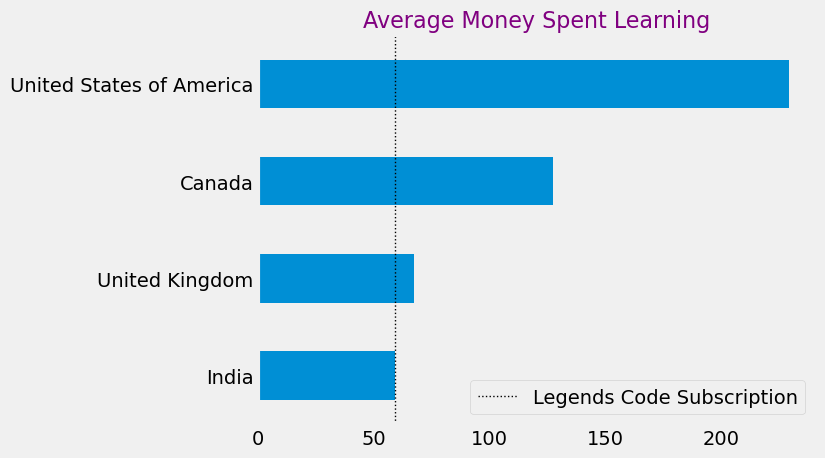

In [32]:
top_four.groupby('CountryLive')['MonthlySpent'].mean().sort_values().plot.barh(label = '')
plt.ylabel('')
plt.title('Average Money Spent Learning', fontsize=16, color='purple')
plt.axvline(59, linewidth = 1, linestyle= 'dotted', label = 'Legends Code Subscription', color='black')
plt.legend()
plt.grid(False)

### Comments:

Looking at the average spent. The USA spends the most with Canada second. 

If we look at the median. The median is at 0 for 3 of the top 4 countries. 

The mode is also 0.

All four countries on average meet the required subscription. India is at the lowest with $59.23. 

Lets break down what the percentage of the population for each country is willing to spend 59 USD or more to learn a month. Then we will need to take the population and percentage to see which is the best to invest in. 

In [33]:
america = top_four[top_four['CountryLive'] == 'United States of America']
america_spent = round((america['MonthlySpent'] >= 59).value_counts(normalize=True) * 100,2)

uk = top_four[top_four['CountryLive'] == 'United Kingdom']
uk_spent = round((uk['MonthlySpent'] >= 59).value_counts(normalize=True) * 100,2)

canada = top_four[top_four['CountryLive'] == 'Canada']
canada_spent = round((canada['MonthlySpent'] >= 59).value_counts(normalize=True) * 100,2)

india = top_four[top_four['CountryLive'] == 'India']
india_spent = round((india['MonthlySpent'] >= 59).value_counts(normalize=True) * 100,2)

print(america_spent, uk_spent, canada_spent, india_spent)



False    78.36
True     21.64
Name: MonthlySpent, dtype: float64 False    86.79
True     13.21
Name: MonthlySpent, dtype: float64 False    82.63
True     17.37
Name: MonthlySpent, dtype: float64 False    90.36
True      9.64
Name: MonthlySpent, dtype: float64


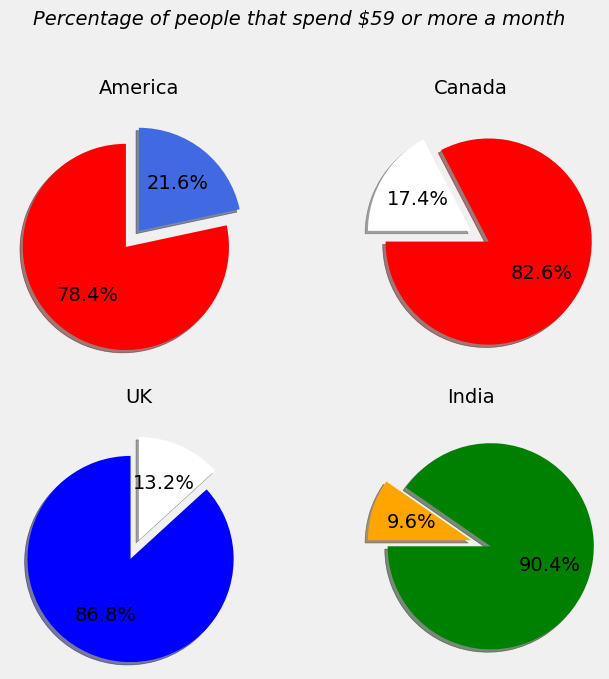

In [47]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(7,7))

ax1.pie(america_spent,autopct='%1.1f%%',shadow=True, startangle=90, explode=(0.2,0), colors=('red','royalblue'))
ax1.set_title('America', fontsize=14)

ax2.pie(canada_spent, autopct='%1.1f%%', shadow=True, startangle=180, explode=(0.2,0), colors=('red','white'))
ax2.set_title('Canada',fontsize=14)

ax3.pie(uk_spent,autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.2,0), colors=('blue','white'))
ax3.set_title('UK',fontsize=14)

ax4.pie(india_spent,autopct='%1.1f%%', shadow=True, startangle=180, explode=(0.2,0), colors=('green','orange'))
ax4.set_title('India',fontsize=14)

plt.text(-4.25,5, 'Percentage of people that spend $59 or more a month', fontsize=14, fontstyle='oblique')
plt.show()

### Comments:

As we can see from the pie chart above the percentage of people willing to spend 59 USD will lead us to conclude America and Canada would be our top two picks. 21.6% of respondents in America are willing to spend 59 dollars or above on learning. Canada comes in 2nd place with 17.4% of respondents.

Is this a good representation of data? For example say we wanted to split the advertising budget focusing more resources on the two biggest populations willing to spend money meeting Legends Code monthly subscription price. 

Based on percentage we would say America and Canada have the largest portions of students willing to pay 59 USD or more. The question remains what is the size of the population and what do these percents actually add up to?

In [35]:
uk_spent_numbers = (uk['MonthlySpent'] >= 59).value_counts()
america_spent_numbers = (america['MonthlySpent'] >= 59).value_counts() 
canada_spent_numbers =(canada['MonthlySpent'] >= 59).value_counts()
india_spent_numbers = (india['MonthlySpent'] >= 59).value_counts() 

data = { 'True': [1253,107,100,135],
         'False':[4538,509,657,1265]}

raw_numbers = pd.DataFrame(data, index=['United States','Canada', 'U.K.', 'India'])

print(raw_numbers)

               True  False
United States  1253   4538
Canada          107    509
U.K.            100    657
India           135   1265


### Comments: 

As we can see this data is a bit more useful if we wanted to distribute advertising funds unevenly. We are dealing with a small population in each country but India has 28 more individuals than Canada that we can potentially capture. 


### Dealing with Extreme Outliers

Previously looking through the data of money available for learning I noticed some really high budgets. Ill visualize the data by a box plot for each country and view the monthly budgets. See how exterme the outliers are. 

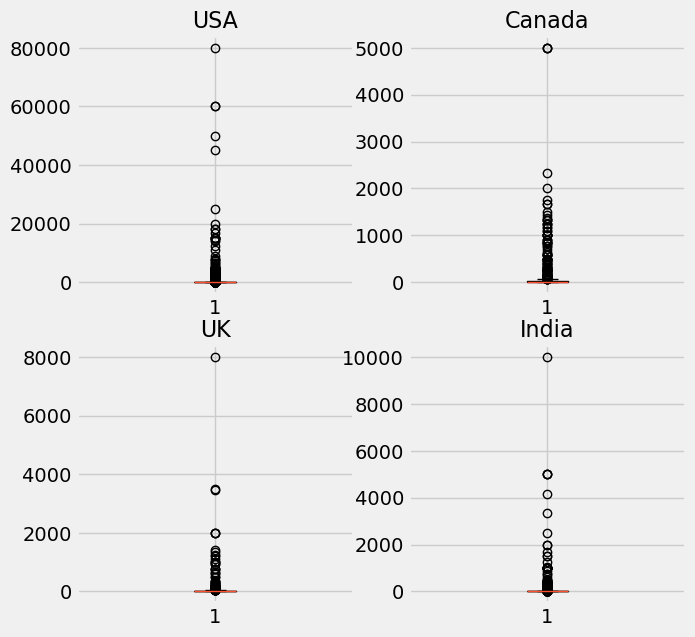

In [36]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(7,7))

ax1.boxplot(america['MonthlySpent'])
ax1.set_title('USA', fontsize=16)
ax2.boxplot(canada['MonthlySpent'])
ax2.set_title('Canada', fontsize=16)
ax3.boxplot(uk['MonthlySpent'])
ax3.set_title('UK', fontsize=16)
ax4.boxplot(india['MonthlySpent'])
ax4.set_title('India', fontsize=16)
plt.show()

### Comments: 

As we can see above: 

* The USA has some learning budgets exceeding 20,000 USD with max of 80,000 USD. 
* Canada's learning budgets has a few outliers I would say pretty much 1,500 USD or above with a max of 5,000. 
* The UK's learning budget seems to have the same as Canada. Above 1,500 with a max of 8,000. 
* India's learning budget seems to be a similar outcome as Canada and the UK. With 1500 USD and above. With a max of 10,000.

Lets take a more closer zoomed in look of each:

In [37]:
usa_20 = america[america['MonthlySpent'] <= 20000] 
canada_20 = canada[canada['MonthlySpent'] <= 2000]
uk_20 = uk[uk['MonthlySpent'] <= 2000]
india_20  = india[india['MonthlySpent'] <= 2000]

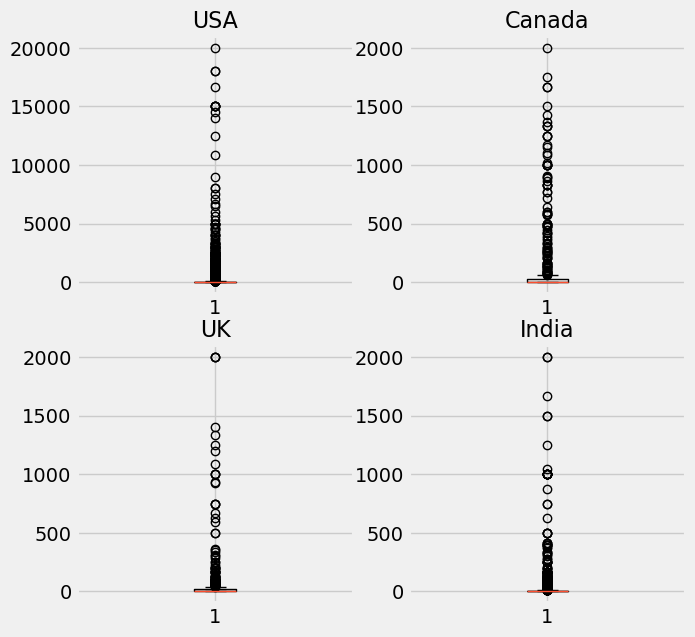

In [38]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(7,7))

ax1.boxplot(usa_20['MonthlySpent'])
ax1.set_title('USA', fontsize=16)
ax2.boxplot(canada_20['MonthlySpent'])
ax2.set_title('Canada', fontsize=16)
ax3.boxplot(uk_20['MonthlySpent'])
ax3.set_title('UK', fontsize=16)
ax4.boxplot(india_20['MonthlySpent'])
ax4.set_title('India', fontsize=16)
plt.show()

### Comments: 

Looking above I would safely say anything above: 

* 15,000 USD for the USA is probably an outlier value with smaller percentage
* For the UK and Canada I would say anything above 1,500 USD its probably an outlier and smaller percentage. 
* India I would say anything above 1,000 USD is probably an outlier. 

### Lets see how many outliers we have in each country

In [39]:
over_15  = america[america['MonthlySpent'] > 15000]

over_15.head(10)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpent
1393,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,More than 60 minutes,United States of America,United States of America,food and beverage,NaN,Self-employed freelancer,NaN,NaN,NaN,NaN,female,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,20.0,9fbddc9cd1520a559b923261e9745124,adecc9cbdf4655078ef2da2ccd1e5b12,NaN,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,freelance,NaN,NaN,NaN,English,"single, never married",90000.0,2.0,8dcd4e27e2,2017-03-10 04:49:08,2017-03-10 04:47:49,2017-03-10 04:51:43,2017-03-10 04:49:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,45000.000000
1964,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I work from home,Brazil,United States of America,NaN,Childcare,Employed for wages,NaN,80000.0,NaN,NaN,female,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,a0eb0dd0c75ca7d6a06825c0130c289e,f323202eee5bed7eff6ef50c7c2aebac,6600.0,0.0,0.0,0.0,0.0,more than 12 months from now,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,work for a multinational corporation,1.0,"[game developer, full stack web developer, use...",in an office with other developers,Portuguese,"single, never married",20000.0,1.0,f6389d0e7c,2017-03-10 14:48:11,2017-03-10 14:41:16,2017-03-10 14:50:48,2017-03-10 14:48:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [40]:
over_1500  = canada[canada['MonthlySpent'] > 1500]

over_1500.head(10)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpent
24,26.0,1.0,1.0,0.0,HackerYou,1.0,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,1.0,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,eda0f274a8672ea589f041b45723e9ee,e13e6d5c44d66aad00b05c605a706b2c,40000.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,"single, never married",10000.0,6.0,4106e1f231,2017-03-09 01:21:04,2017-03-09 01:17:32,2017-03-09 01:22:24,2017-03-09 01:21:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,master's degree (non-professional),Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1666.666667
6434,25.0,1.0,1.0,0.0,Lighthouse Labs,1.0,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,More than 60 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,0.0,female,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,15.0,15d97742330db41b56d258268f4fba78,5448476a236908bb8cfe3bd5eb094399,45000.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,"single, never married",20000.0,12.0,31a5d3a192,2017-03-20 16:40:00,2017-03-20 16:21:08,2017-03-20 16:42:03,2017-03-20 16:40:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,bachelor's degree,Geography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1666.666667
6590,20.0,1.0,1.0,0.0,Lighthouse Labs,1.0,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,N

In [41]:
over_15uk  = uk[uk['MonthlySpent'] > 1500]

over_15uk.head(10)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpent
6483,30.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30 to 44 minutes,United Kingdom,United Kingdom,"arts, entertainment, sports, or media",NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,NaN,NaN,bcf80c4226c2acef0699cdb4f3ccbf12,8a08cd45d25702867b5a687869e2498e,37046.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,3457.0,1.0,d93e352ed7,2017-03-20 19:02:26,2017-03-20 18:59:36,2017-03-20 19:04:57,2017-03-20 19:02:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,bachelor's degree,English Language Studies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3457.0
7799,25.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30 to 44 minutes,France,United Kingdom,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,1.0,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,5.0,2c82b7c37b2412476804d8cc8ff96f06,8ebf27b51c0e7e02169da7afdd1d3820,27434.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,"single, never married",7000.0,2.0,8524606618,2017-03-25 11:54:56,2017-03-25 11:52:28,2017-03-25 11:57:39,2017-03-25 11:55:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,master's degree (non-professional),Marketing,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
9310,28.0,1.0,1.0,0.0,Makers Academy,1.0,NaN,more than 1 million,NaN,NaN,NaN

In [42]:
over_ind  = india[india['MonthlySpent'] > 1500]

over_ind.head(10)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlySpent
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"[user experience designer, mobile developer, p...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"[information security, full stack web develope...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,N

### Comments: 

In the USA out of the 10 outliers above 15,000 3 are attending a boot camp. 

True outliers: 1393,1964,2478,14024,15631,16650,17093

In Canada we have 8 outliers above 1,500 USD. 4 of them are currently attending a boot camp. 

True outliers: 7193,8726,,14422,16921

In the U.K. we have 6 outliers above 1,500 USD. 3 are attending a bootcamp.

True outliers: 6483,7799,9401

In India we have 10 outliers and only 1 attended a bootcamp. 

True outliers: 1728,1755,2044,7989,8126,9410,12451,13398,15587


### Removing outliers and viewing impact:

In [43]:
america_fresh = america.drop([1393,1964,2478,14024,15631,16650,17093])

canada_fresh = canada.drop([7193,8726,14422,16921])

uk_fresh = uk.drop([6483,7799,9401])

india_fresh = india.drop([1728,1755,2044,7989,8126,9410,12451,13398,15587])

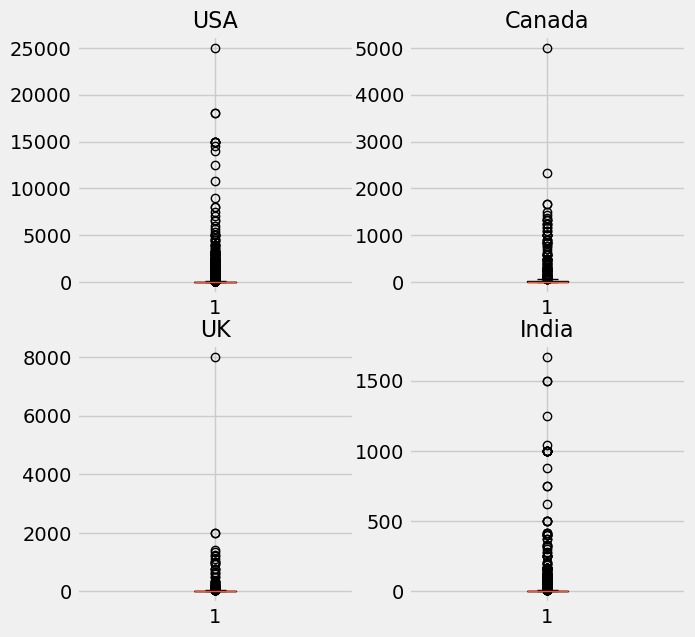

In [44]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(7,7))

ax1.boxplot(america_fresh['MonthlySpent'])
ax1.set_title('USA', fontsize=16)
ax2.boxplot(canada_fresh['MonthlySpent'])
ax2.set_title('Canada', fontsize=16)
ax3.boxplot(uk_fresh['MonthlySpent'])
ax3.set_title('UK', fontsize=16)
ax4.boxplot(india_fresh['MonthlySpent'])
ax4.set_title('India', fontsize=16)
plt.show()

In [45]:
america_fresh['MonthlySpent'].mean().round()
canada_fresh['MonthlySpent'].mean().round()
uk_fresh['MonthlySpent'].mean().round()
india_fresh['MonthlySpent'].mean().round()

32.0

### Comments: 


Country| Average | Previous Average
------ |-------|-------
USA | 172 | 229
Canada | 106 | 128
U.K. | 56 | 67
India | 32 | 59


We can see how the mean for each country has drastically decreased after removing the top outliers. I took a conservative approach originally. To recall the data in the MoneyforLearning column had many NaN values. What I originally did was converted these NaN values to a 0.00 amount. This altered my analysis throughout the project. As it stands right now the USA and Canada would be my top 2 choices to market in. India was showing potential originally having a larger population than Canada. What I will do now is go back to the original data and drop the NaN values in India. I will then remove the outliers like I did and see how this impacts the average monthly spent column. 


### Dropping NaN values in India instead of converting to 0.00: 

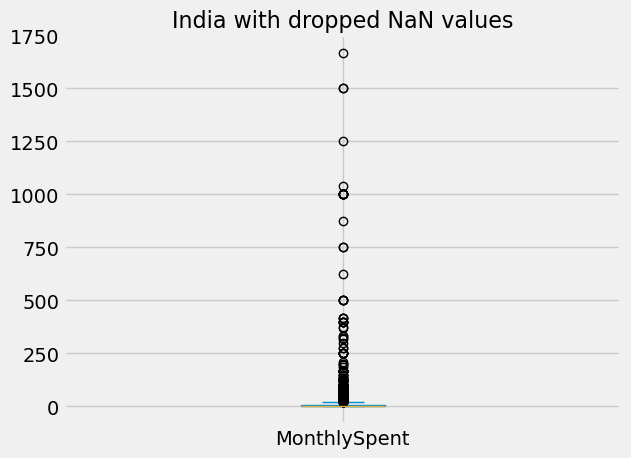

count    1212.000000
mean       34.841987
std       142.638259
min         0.000000
25%         0.000000
50%         0.000000
75%         8.103070
max      1666.666667
Name: MonthlySpent, dtype: float64

In [46]:
#capturing only the country India

india_country = ['India']

top_india = survey_2017[survey_2017['CountryLive'].isin(india_country)].copy()

# dropping NaN values
top_india = top_india.dropna(subset='MoneyForLearning')
top_india = top_india.dropna(subset='MonthsProgramming')

#converting 0 months to 1 month

top_india['MonthsProgramming'] = top_india['MonthsProgramming'].replace([0.0], 1)

#recreating the monthly spent column

top_india['MonthlySpent'] = top_india['MoneyForLearning'] / top_india['MonthsProgramming']

#confirming same outliers 

over_india  = india[india['MonthlySpent'] > 1500]

#removing outliers 

top_india = top_india.drop([1728,1755,2044,7989,8126,9410,12451,13398,15587])


top_india['MonthlySpent'].plot.box()
plt.title('India with dropped NaN values', fontsize=16)
plt.show()

top_india['MonthlySpent'].describe()

### Comments: 

As we can see this barely impacted the results. The average went from 32 USD a month to 34.84 USD a month. The only way to increase the average would be to keep more of the outliers. I only removed the top 9 outliers and this dropped India's average from 59.23 USD to a range of 32-35 USD. Too much weight is placed on the top 9 outliers so I do not think this would be a wise decision to include them. 

### Recommendation: 

My recommendation for Legends Code would be to run an advertising campaign in the United States of America and Canada. The reasoning behind the top 2. 

* USA has a monthly average of 172 USD to spend on learning 
* Canada has a monthly average of 106 USD to spend on learning
* Both countries are interested in Web and App development. 
* Both countries use the English language. 

For the disbursement of the advertising budget:

I broke down the interest of each programming field by job role originally. The United States of America by far had the the highest percentages. Around 40% interested in Web development and 25% interested in app development. 

Canada even though was in the top 5 countries had a much lower percentage around 3% for each job type. 

As for population the United States had 12 times the population size of Canada. 

* Given this information I would primarly focus the advertising campaign in the United States. 

If I were to weigh it I would put 80% of the advertising budget in the US and 20% of the advertising budget in Canada. 
The weight of distribution of advertising can be left for Legends Code executive team to decide. 

I would not rule out Canada but I would give a portion of the advertisement budget and see how it generates traffic to Legends Code's website. 

My recommendation for a future survey: 

We had much more of a population size from the United States of America compared to the other countries. 
I would recommend setting aside a future budget to survey people in Canada and India directly. 
Both of these countries still have potential to be a good source of new programmers. 
With Canada we had a small population but the monthly budget for learning is there.
In India we had a decent size population but the monthly budget was low. 
We were also missing a good portion of a monthly budget for learning in India. 
